In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt

from PreProcessing import PreProcessingShapefiles
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=sys.maxsize)

In [2]:
pps = PreProcessingShapefiles()

# 1. Read shapefiles

In [3]:
list_shapefiles = pps.loadFiles()

Loading dataset............................. 

0
Folder: D:\Google Drive\University of York courses\Independent Research Proposal\dissertation\data\raw\shapefiles\attention_centers_violence_against_women\
File Name: Centros_atención_violencia_mujer.shp
Rows: 1815, columns: 9 

Loading dataset............................. 

1
Folder: D:\Google Drive\University of York courses\Independent Research Proposal\dissertation\data\raw\shapefiles\basic_education\
File Name: Equip_básico_educ.shp
Rows: 1815, columns: 12 

Loading dataset............................. 

2
Folder: D:\Google Drive\University of York courses\Independent Research Proposal\dissertation\data\raw\shapefiles\cablebus_routes_stations\
File Name: STE_Cablebus_estaciones_utm14n.shp
Rows: 13, columns: 12 

3
Folder: D:\Google Drive\University of York courses\Independent Research Proposal\dissertation\data\raw\shapefiles\cablebus_routes_stations\
File Name: STE_Cablebus_lineas_utm14n.shp
Rows: 3, columns: 4 

Loading dataset...

# 2. Reproject shapefiles

In [4]:
rp_list_shapefiles = pps.reprojectShapefiles(list_shapefiles)

All shapefiles were successfully reprojected.


In [5]:
rp_list_shapefiles[0].crs

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# 3. Pre-process neighborhoods dataset (polygons)

In [6]:
neighborhoods = rp_list_shapefiles[11]
neighborhoods.head()

,ENT,CVEDT,NOMDT,DTTOLOC,CVEUT,NOMUT,POB2010,ID,geometry
0,9,2,AZCAPOTZALCO,05,02-001,AGUILERA,2014,1,"POLYGON ((483311.618 2153254.848, 483332.006 2..."
1,9,2,AZCAPOTZALCO,05,02-002,ALDANA,3378,2,"POLYGON ((484406.956 2153012.331, 484401.132 2..."
2,9,2,AZCAPOTZALCO,05,02-005,ANGEL ZIMBRON,2737,3,"POLYGON ((480013.755 2153003.618, 480026.649 2..."
3,9,2,AZCAPOTZALCO,05,02-006,ARENAL,4817,4,"POLYGON ((484061.118 2152622.284, 484061.678 2..."
4,9,2,AZCAPOTZALCO,03,02-007,CENTRO DE AZCAPOTZALCO,3043,5,"POLYGON ((480104.707 2154525.214, 480118.178 2..."


In [7]:
neighborhoods.isna().sum()

ENT         0
CVEDT       0
NOMDT       0
DTTOLOC     0
CVEUT       0
NOMUT       0
POB2010     0
ID          0
geometry    0
dtype: int64

In [8]:
neighborhoods_cdmx = neighborhoods[["CVEUT", "NOMUT", "geometry", "CVEDT", "NOMDT"]]
neighborhoods_cdmx.columns = ["key_neighbor", "name_neighbor", "geometry", "key_borough", "name_borough"]
neighborhoods_cdmx.head()

,key_neighbor,name_neighbor,geometry,key_borough,name_borough
0,02-001,AGUILERA,"POLYGON ((483311.618 2153254.848, 483332.006 2...",2,AZCAPOTZALCO
1,02-002,ALDANA,"POLYGON ((484406.956 2153012.331, 484401.132 2...",2,AZCAPOTZALCO
2,02-005,ANGEL ZIMBRON,"POLYGON ((480013.755 2153003.618, 480026.649 2...",2,AZCAPOTZALCO
3,02-006,ARENAL,"POLYGON ((484061.118 2152622.284, 484061.678 2...",2,AZCAPOTZALCO
4,02-007,CENTRO DE AZCAPOTZALCO,"POLYGON ((480104.707 2154525.214, 480118.178 2...",2,AZCAPOTZALCO


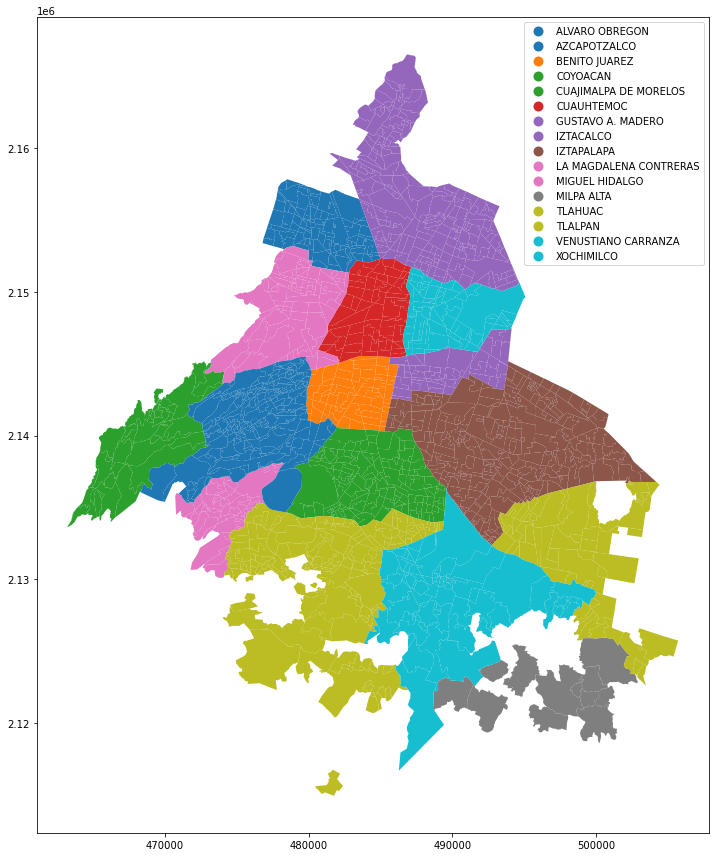

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [124]:
neighborhoods_cdmx.plot("name_borough", legend=True, figsize=(15,15))
plt.show()
neighborhoods_cdmx.crs

In [10]:
neighborhoods_cdmx.name_borough.unique()

array(['AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN', 'GUSTAVO A. MADERO',
       'IZTAPALAPA', 'MIGUEL HIDALGO', 'TLALPAN', 'CUAJIMALPA DE MORELOS',
       'CUAUHTEMOC', 'IZTACALCO', 'LA MAGDALENA CONTRERAS', 'MILPA ALTA',
       'TLAHUAC', 'VENUSTIANO CARRANZA', 'XOCHIMILCO', 'ALVARO OBREGON'],
      dtype=object)

In [11]:
print(neighborhoods_cdmx.isna().sum())
print(len(neighborhoods_cdmx.key_neighbor.unique()))
print(neighborhoods_cdmx.shape[0])

key_neighbor     0
name_neighbor    0
geometry         0
key_borough      0
name_borough     0
dtype: int64
1815
1815


# 4. Pre-process datasets

In [12]:
processed_list_shapefiles = []

## 0 Centres for violence against women

In [13]:
item = 0
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(1815, 9) 



,cve_ent,alcaldia,cve_col,colonia,pob_2010,SUP_COL_M2,COUNT_orie,C_CA_VIOLM,geometry
0,09,AZCAPOTZALCO,02-007,CENTRO DE AZCAPOTZALCO,3043.0,424471.0,1,4,"POLYGON ((480104.707 2154525.214, 480118.178 2..."
1,09,AZCAPOTZALCO,02-015,DEL GAS,4857.0,345622.0,2,3,"POLYGON ((483887.486 2153038.087, 483873.974 2..."
2,09,AZCAPOTZALCO,02-017,DEL MAESTRO,718.0,50526.4,3,2,"POLYGON ((480806.503 2154401.927, 480818.190 2..."
3,09,AZCAPOTZALCO,02-081,SAN MARTIN XOCHINAHUAC (PBLO),5608.0,1461190.0,2,3,"POLYGON ((480473.404 2157162.779, 480547.443 2..."
4,09,BENITO JUAREZ,14-052,ALAMOS II,8650.0,482332.0,1,4,"POLYGON ((484704.714 2144904.336, 484783.147 2..."


In [14]:
print(len(rp_list_shapefiles[item].cve_col.unique()), '\n')

1815 



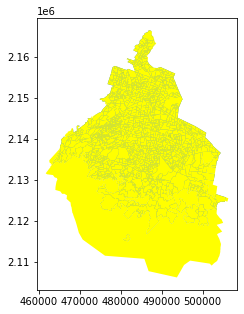

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [16]:
print(rp_list_shapefiles[item].isna().sum())
print(rp_list_shapefiles[item].alcaldia.unique(), '\n')
rp_list_shapefiles[item].columns

cve_ent       1
alcaldia      1
cve_col       1
colonia       1
pob_2010      0
SUP_COL_M2    0
COUNT_orie    0
C_CA_VIOLM    0
geometry      0
dtype: int64
['AZCAPOTZALCO' 'BENITO JUAREZ' 'GUSTAVO A. MADERO' 'IZTACALCO'
 'IZTAPALAPA' 'COYOACAN' 'MIGUEL HIDALGO' 'ALVARO OBREGON' 'TLALPAN'
 'CUAJIMALPA DE MORELOS' 'CUAUHTEMOC' 'LA MAGDALENA CONTRERAS'
 'XOCHIMILCO' 'MILPA ALTA' 'TLAHUAC' 'VENUSTIANO CARRANZA' None] 



Index(['cve_ent', 'alcaldia', 'cve_col', 'colonia', 'pob_2010', 'SUP_COL_M2', 'COUNT_orie', 'C_CA_VIOLM', 'geometry'], dtype='object')

In [17]:
cols = ['cve_col', 'COUNT_orie']
centres_vaw = rp_list_shapefiles[item][cols]
centres_vaw.columns = ["key_neighbor", "centres_vaw"]
centres_vaw.head(3)

,key_neighbor,centres_vaw
0,02-007,1
1,02-015,2
2,02-017,3


In [18]:
processed_list_shapefiles.append(centres_vaw)

## 1 Basic education schools

In [19]:
item = 1
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(1815, 12) 



,cve_ent,alcaldia,cve_col,colonia,pob_2010,NoEqEduBas,DisEqBas_m,Ci_EqEduB,Ci_DisEqBa,S_EqEdDist,C_EqEduBas,geometry
0,09,AZCAPOTZALCO,02-001,AGUILERA,2014.0,1,282.167,4,2,6,3,"POLYGON ((483311.618 2153254.848, 483332.006 2..."
1,09,AZCAPOTZALCO,02-002,ALDANA,3378.0,2,224.227,4,1,5,3,"POLYGON ((484406.956 2153012.331, 484401.132 2..."
2,09,AZCAPOTZALCO,02-005,ANGEL ZIMBRON,2737.0,3,314.167,3,3,6,3,"POLYGON ((480275.324 2152244.351, 480267.968 2..."
3,09,AZCAPOTZALCO,02-006,ARENAL,4817.0,4,267.369,3,2,5,3,"POLYGON ((484061.118 2152622.284, 484061.678 2..."
4,09,AZCAPOTZALCO,02-007,CENTRO DE AZCAPOTZALCO,3043.0,7,268.656,1,2,3,1,"POLYGON ((480104.707 2154525.214, 480118.178 2..."


In [20]:
print(len(rp_list_shapefiles[item].cve_col.unique()), '\n')

1815 



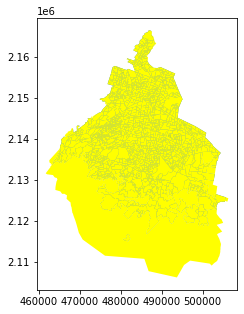

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [22]:
print(rp_list_shapefiles[item].isna().sum())
print(rp_list_shapefiles[item].alcaldia.unique(), '\n')
rp_list_shapefiles[item].columns

cve_ent       1
alcaldia      1
cve_col       1
colonia       1
pob_2010      0
NoEqEduBas    0
DisEqBas_m    0
Ci_EqEduB     0
Ci_DisEqBa    0
S_EqEdDist    0
C_EqEduBas    0
geometry      0
dtype: int64
['AZCAPOTZALCO' 'BENITO JUAREZ' 'GUSTAVO A. MADERO' 'IZTACALCO'
 'IZTAPALAPA' 'ALVARO OBREGON' 'COYOACAN' 'MIGUEL HIDALGO' 'TLALPAN'
 'CUAJIMALPA DE MORELOS' 'CUAUHTEMOC' 'LA MAGDALENA CONTRERAS'
 'XOCHIMILCO' 'MILPA ALTA' 'TLAHUAC' 'VENUSTIANO CARRANZA' None] 



Index(['cve_ent', 'alcaldia', 'cve_col', 'colonia', 'pob_2010', 'NoEqEduBas', 'DisEqBas_m', 'Ci_EqEduB', 'Ci_DisEqBa', 'S_EqEdDist', 'C_EqEduBas', 'geometry'], dtype='object')

In [23]:
cols = ['cve_col', 'NoEqEduBas']
basic_education = rp_list_shapefiles[item][cols]
basic_education.columns = ["key_neighbor", "be_schools"]
basic_education.head(3)

,key_neighbor,be_schools
0,02-001,1
1,02-002,2
2,02-005,3


In [24]:
processed_list_shapefiles.append(basic_education)

## 2 Cablebus stations

In [25]:
item = 2
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(13, 12) 



,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,TIPO,ALCALDIAS,AÑO,Elevadores,Guia_tact,P_braile,geometry
0,STE Cablebús,Indios Verdes,01,01,CB0101,Terminal,Gustavo A. Madero,2021,Sí,Sí,No,POINT Z (487170.808 2155653.282 0.000)
1,STE Cablebús,Ticomán,01,02,CB0102,Intermedia,Gustavo A. Madero,2021,Sí,Sí,No,POINT Z (485960.662 2157449.810 0.000)
2,STE Cablebús,La Pastora,01,03,CB0103,Intermedia,Gustavo A. Madero,2021,Sí,Sí,No,POINT Z (485228.381 2159185.799 0.000)
3,STE Cablebús,Campos Revolución,01,04,CB0104,Intermedia,Gustavo A. Madero,2021,Sí,Sí,No,POINT Z (485107.700 2160614.621 0.000)
4,STE Cablebús,Cuautepec,01,05,CB0105,Terminal,Gustavo A. Madero,2021,Sí,Sí,No,POINT Z (485927.658 2162570.367 0.000)


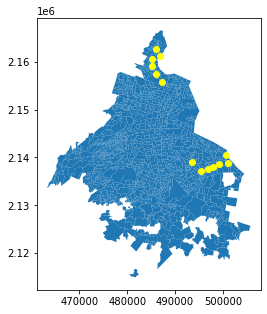

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [27]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

SISTEMA       0
NOMBRE        0
LINEA         0
EST           0
CVE_EST       0
TIPO          0
ALCALDIAS     0
AÑO           0
Elevadores    0
Guia_tact     0
P_braile      0
geometry      0
dtype: int64


Index(['SISTEMA', 'NOMBRE', 'LINEA', 'EST', 'CVE_EST', 'TIPO', 'ALCALDIAS', 'AÑO', 'Elevadores', 'Guia_tact', 'P_braile', 'geometry'], dtype='object')

In [28]:
cols = ['CVE_EST', 'geometry']
cablebus_stations = rp_list_shapefiles[item][cols]
cablebus_stations.head(3)

,CVE_EST,geometry
0,CB0101,POINT Z (487170.808 2155653.282 0.000)
1,CB0102,POINT Z (485960.662 2157449.810 0.000)
2,CB0103,POINT Z (485228.381 2159185.799 0.000)


In [29]:
processed_list_shapefiles.append(cablebus_stations)

## 3 Cablebus line routes

In [30]:
item = 3
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(3, 4) 



,SISTEMA,LINEA,RUTA,geometry
0,STE Cablebús,1,Indios Verdes - Cuautepec,"LINESTRING Z (487170.808 2155653.282 0.000, 48..."
1,STE Cablebús,1,Antena Tlalpexco,"LINESTRING Z (486737.465 2161111.843 0.000, 48..."
2,STE Cablebús,2,Constitución de 1917 - Santa Marta,"LINESTRING Z (493435.000 2138987.000 0.000, 49..."


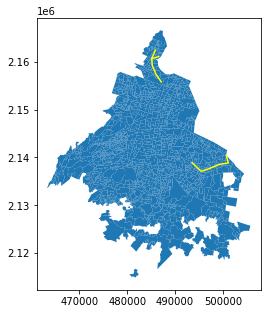

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [32]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

SISTEMA     0
LINEA       0
RUTA        0
geometry    0
dtype: int64


Index(['SISTEMA', 'LINEA', 'RUTA', 'geometry'], dtype='object')

In [33]:
cols = ['RUTA', 'geometry']
cablebus_lines = rp_list_shapefiles[item][cols]
cablebus_lines.head(3)

,RUTA,geometry
0,Indios Verdes - Cuautepec,"LINESTRING Z (487170.808 2155653.282 0.000, 48..."
1,Antena Tlalpexco,"LINESTRING Z (486737.465 2161111.843 0.000, 48..."
2,Constitución de 1917 - Santa Marta,"LINESTRING Z (493435.000 2138987.000 0.000, 49..."


In [34]:
processed_list_shapefiles.append(cablebus_lines)

## 4 Commercial venues

In [35]:
item = 4
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(840, 11) 



,ID,TIPO,INSTITUCIO,CALLE,NUMERO,REFERENCIA,COLONIA,C_P_,Observacio,Alcaldía,geometry
0,1.0,TIENDAS DEPARTAMENTALES,"SANBORNS HERMANOS, S.A DE C.V.",Insurgentes Sur,2105,None,Sn. Angel,01000,None,Álvaro Obregón,POINT (480252.031 2139217.305)
1,2.0,TIENDAS DEPARTAMENTALES,Electra,Dr. Galvez,31,Esq. Revolución,Sn. Angel,01000,None,Álvaro Obregón,POINT (479974.338 2138843.603)
2,3.0,TIENDAS DEPARTAMENTALES,"SANBORNS HERMANOS, S.A DE C.V.",Camino Desierto de los Leones,52,Esq. Revolución,Sn. Angel,01000,None,Álvaro Obregón,POINT (480101.021 2139431.693)
3,4.0,PLAZAS COMERCIALES,None,Insugentes Sur,1971,Entre Río Sn. Angel y Fernando Villapando,Guadalupe Inn.,01020,None,Álvaro Obregón,POINT (480312.094 2139786.105)
4,5.0,CENTRO COMERCIAL,CENTRO COMERCIAL EL RELOX,Insurjentes Sur,2374,Entre Privada Relox y Loreto,Ermita,01070,None,Álvaro Obregón,POINT (480062.120 2138505.004)


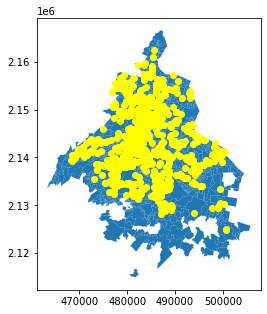

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [37]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

ID              0
TIPO            8
INSTITUCIO     20
CALLE          14
NUMERO         37
REFERENCIA    561
COLONIA        23
C_P_           20
Observacio    722
Alcaldía        0
geometry        0
dtype: int64


Index(['ID', 'TIPO', 'INSTITUCIO', 'CALLE', 'NUMERO', 'REFERENCIA', 'COLONIA', 'C_P_', 'Observacio', 'Alcaldía', 'geometry'], dtype='object')

In [38]:
cols = ['INSTITUCIO', 'geometry']
commercial_venues = rp_list_shapefiles[item][cols]
commercial_venues.head(3)

,INSTITUCIO,geometry
0,"SANBORNS HERMANOS, S.A DE C.V.",POINT (480252.031 2139217.305)
1,Electra,POINT (479974.338 2138843.603)
2,"SANBORNS HERMANOS, S.A DE C.V.",POINT (480101.021 2139431.693)


In [39]:
processed_list_shapefiles.append(commercial_venues)

## 5 Public transport routes

In [40]:
item = 5
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(989, 5) 



,SISTEMA,RUTA,RAMAL,DETALLE,geometry
0,Transporte Público Concesionado de Ruta,103,Metro Salto Del Agua - Cuemanco x Fovissste,None,MULTILINESTRING Z ((484842.671 2148051.587 0.0...
1,Transporte Público Concesionado de Ruta,2,Metro Chapultepec - Espartaco,None,MULTILINESTRING Z ((481584.985 2147386.309 0.0...
2,Transporte Público Concesionado de Ruta,2,Metro Chapultepec - Prepa 5,None,MULTILINESTRING Z ((481584.985 2147386.309 0.0...
3,Transporte Público Concesionado de Ruta,2,Metro Chapultepec - Estadio Azteca,None,MULTILINESTRING Z ((481584.985 2147386.309 0.0...
4,Transporte Público Concesionado de Ruta,79,Metro Salto Del Agua - Cuemanco,None,MULTILINESTRING Z ((484842.639 2148051.632 0.0...


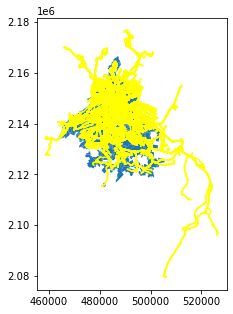

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [42]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

SISTEMA       0
RUTA          0
RAMAL         0
DETALLE     421
geometry      0
dtype: int64


Index(['SISTEMA', 'RUTA', 'RAMAL', 'DETALLE', 'geometry'], dtype='object')

In [43]:
cols = ['RAMAL', 'geometry']
route_public_transport = rp_list_shapefiles[item][cols]
route_public_transport.head(3)

,RAMAL,geometry
0,Metro Salto Del Agua - Cuemanco x Fovissste,MULTILINESTRING Z ((484842.671 2148051.587 0.0...
1,Metro Chapultepec - Espartaco,MULTILINESTRING Z ((481584.985 2147386.309 0.0...
2,Metro Chapultepec - Prepa 5,MULTILINESTRING Z ((481584.985 2147386.309 0.0...


In [44]:
processed_list_shapefiles.append(route_public_transport)

## 6 Economic units (commercial, industrial, services)

In [45]:
item = 6
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(1812, 12) 



,FID_1,nombre,entidad,cve_alc,alcaldia,cve_col,ue,ind,com,serv,sup_ha,geometry
0,0,LOMAS DE CHAPULTEPEC,9.0,16.0,MIGUEL HIDALGO,16-042,1960,37,500,1403,312.608615,"POLYGON ((476886.889 2148204.177, 476895.408 2..."
1,1,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),9.0,16.0,MIGUEL HIDALGO,16-044,27,0,7,7,78.368909,"POLYGON ((475887.127 2146658.900, 475884.580 2..."
2,2,DEL BOSQUE (POLANCO),9.0,16.0,MIGUEL HIDALGO,16-026,129,4,27,101,12.367361,"POLYGON ((478143.161 2148731.887, 478151.166 2..."
3,3,PEDREGAL DE SANTA URSULA I,9.0,3.0,COYOACAN,03-135,608,49,326,231,58.544747,"POLYGON ((484676.345 2136218.237, 484685.542 2..."
4,4,AJUSCO I,9.0,3.0,COYOACAN,03-128,854,58,400,397,69.043070,"POLYGON ((483346.833 2137391.153, 483418.954 2..."


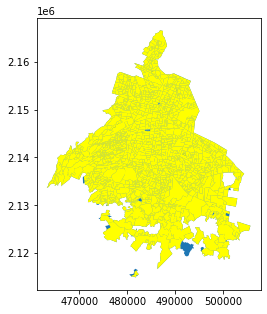

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [47]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

FID_1       0
nombre      0
entidad     0
cve_alc     0
alcaldia    0
cve_col     0
ue          0
ind         0
com         0
serv        0
sup_ha      0
geometry    4
dtype: int64


Index(['FID_1', 'nombre', 'entidad', 'cve_alc', 'alcaldia', 'cve_col', 'ue', 'ind', 'com', 'serv', 'sup_ha', 'geometry'], dtype='object')

In [48]:
cols = ['cve_col', 'com', 'ind', 'serv']
economic_units = rp_list_shapefiles[item][cols]
economic_units.columns = ["key_neighbor", "commercial_units", "industrial_units", "service_units"]
economic_units.head(3)

,key_neighbor,commercial_units,industrial_units,service_units
0,16-042,500,37,1403
1,16-044,7,0,7
2,16-026,27,4,101


In [49]:
processed_list_shapefiles.append(economic_units)

## 7 Health centres

In [50]:
item = 7
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(212, 15) 



,ID,NOM_ENT,C__ENTIDAD,N_MUNICI,C_MUNI,N_LOC,C_LOC,N_INSTITU,TOT_CONSU,NOM_UNIDAD,ESTATU_OPE,LONGITUD,LATITUD,tipo_centr,geometry
0,1,CIUDAD DE MEXICO,09,IZTAPALAPA,007,IZTAPALAPA,0001,SECRETARÍA DE SALUD,4,C.S.T-I HONORATO LEAL,EN OPERACIÓN,-99.0519,19.3511,T-I,POINT (494549.089 2139677.450)
1,2,CIUDAD DE MEXICO,09,IZTAPALAPA,007,IZTAPALAPA,0001,SECRETARÍA DE SALUD,5,C.S.T-II ERMITA ZARAGOZA,EN OPERACIÓN,-98.595985,19.214778,T-II,POINT (498335.370 2146708.012)
2,3,CIUDAD DE MEXICO,09,VENUSTIANO CARRANZA,017,VENUSTIANO CARRANZA,0001,SECRETARÍA DE SALUD,6,C.S.T-II JOSÉ MARÍA MORELOS Y PAVÓN,EN OPERACIÓN,-99.12099539999997,19.445398705606472,T-II,POINT (487299.506 2150115.493)
3,4,CIUDAD DE MEXICO,09,IZTAPALAPA,007,IZTAPALAPA,0001,SECRETARÍA DE SALUD,3,C.S.T-III DR. MAXIMILIANO RUÍZ CASTAÑEDA,FUERA DE OPERACIÓN (TOTAL O PARCIAL),-99.0095,19.3626,T-III,POINT (499002.312 2140949.159)
4,5,CIUDAD DE MEXICO,09,ÁLVARO OBREGÓN,010,ÁLVARO OBREGÓN,0001,SECRETARÍA DE SALUD,5,C.S.T-II SANTA ROSA XOCHIAC,FUERA DE OPERACIÓN (TOTAL O PARCIAL),-99.1668,19.3727,T-II,POINT (482483.754 2142075.176)


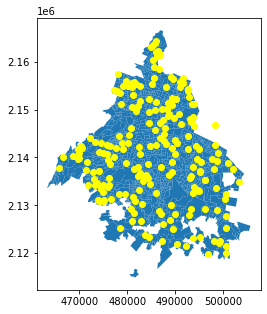

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [51]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [52]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

ID            0
NOM_ENT       0
C__ENTIDAD    0
N_MUNICI      0
C_MUNI        0
N_LOC         0
C_LOC         0
N_INSTITU     0
TOT_CONSU     0
NOM_UNIDAD    0
ESTATU_OPE    0
LONGITUD      0
LATITUD       0
tipo_centr    0
geometry      0
dtype: int64


Index(['ID', 'NOM_ENT', 'C__ENTIDAD', 'N_MUNICI', 'C_MUNI', 'N_LOC', 'C_LOC', 'N_INSTITU', 'TOT_CONSU', 'NOM_UNIDAD', 'ESTATU_OPE', 'LONGITUD', 'LATITUD', 'tipo_centr', 'geometry'], dtype='object')

In [53]:
cols = ['N_INSTITU', 'ESTATU_OPE', 'geometry']
health_centres = rp_list_shapefiles[item][cols]
health_centres.head(3)

,N_INSTITU,ESTATU_OPE,geometry
0,SECRETARÍA DE SALUD,EN OPERACIÓN,POINT (494549.089 2139677.450)
1,SECRETARÍA DE SALUD,EN OPERACIÓN,POINT (498335.370 2146708.012)
2,SECRETARÍA DE SALUD,EN OPERACIÓN,POINT (487299.506 2150115.493)


In [54]:
health_centres.ESTATU_OPE.unique()

array(['EN OPERACIÓN', 'FUERA DE OPERACIÓN (TOTAL O PARCIAL)'],
      dtype=object)

In [55]:
health_centres = health_centres[health_centres.ESTATU_OPE == 'EN OPERACIÓN']
health_centres = health_centres[['N_INSTITU', 'geometry']]
health_centres.head(3)

,N_INSTITU,geometry
0,SECRETARÍA DE SALUD,POINT (494549.089 2139677.450)
1,SECRETARÍA DE SALUD,POINT (498335.370 2146708.012)
2,SECRETARÍA DE SALUD,POINT (487299.506 2150115.493)


In [56]:
processed_list_shapefiles.append(health_centres)

## 8 Main roads

In [57]:
item = 8
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(38, 6) 



,Name,descriptio,tipo_vial,entre,id_vial,geometry
0,EJE 1 NORTE,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,CIRCUITO INTERIOR Y PERIFERICO,1,"LINESTRING Z (482714.673 2150424.403 0.000, 48..."
1,EJE 1 ORIENTE,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,PERIFERICO Y EJE 2 ORIENTE,2,MULTILINESTRING Z ((485585.145 2138927.041 0.0...
2,EJE 1 PONIENTE,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,PERIFERICO Y CIRCUITO INTERIOR,3,MULTILINESTRING Z ((482143.829 2159490.081 0.0...
3,EJE 1 SUR,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,CIRCUITO INTERIOR Y EJE 1 ORIENTE,4,"LINESTRING Z (486811.111 2147922.616 0.000, 48..."
4,EJE 1-A SUR,DescripciÃ³n: <br>tipo_vial: EJES VIALES<br>vi...,EJES VIALES,EJE 1 PONIENTE Y CIRCUITO INTERIOR,5,"LINESTRING Z (483866.670 2147957.757 0.000, 48..."


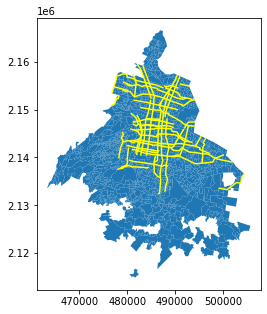

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [58]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [59]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

Name          0
descriptio    0
tipo_vial     0
entre         0
id_vial       0
geometry      0
dtype: int64


Index(['Name', 'descriptio', 'tipo_vial', 'entre', 'id_vial', 'geometry'], dtype='object')

In [60]:
cols = ['Name', 'geometry']
main_roads = rp_list_shapefiles[item][cols]
main_roads.head(3)

,Name,geometry
0,EJE 1 NORTE,"LINESTRING Z (482714.673 2150424.403 0.000, 48..."
1,EJE 1 ORIENTE,MULTILINESTRING Z ((485585.145 2138927.041 0.0...
2,EJE 1 PONIENTE,MULTILINESTRING Z ((482143.829 2159490.081 0.0...


In [61]:
processed_list_shapefiles.append(main_roads)

## 9 Metro stations

In [62]:
item = 9
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(195, 10) 



,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,CVE_EOD17,TIPO,ALCALDIAS,AÑO,geometry
0,STC Metro,Pantitlán,01,01,STC0101,05014,Terminal / Transbordo,Venustiano Carranza,1984,POINT Z (492153.841 2146896.643 0.000)
1,STC Metro,Zaragoza,01,02,STC0102,05020,Intermedia,Venustiano Carranza,1969,POINT Z (491360.644 2146408.623 0.000)
2,STC Metro,Gomez Farías,01,03,STC0103,05007,Intermedia,Venustiano Carranza,1969,POINT Z (490529.234 2146913.395 0.000)
3,STC Metro,Boulevard Puerto Aéreo,01,04,STC0104,05003,Intermedia,Venustiano Carranza,1969,POINT Z (489894.461 2147296.986 0.000)
4,STC Metro,Balbuena,01,05,STC0105,05001,Intermedia,Venustiano Carranza,1969,POINT Z (489210.655 2147675.081 0.000)


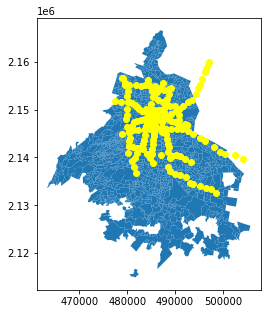

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [63]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [64]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

SISTEMA      0
NOMBRE       0
LINEA        0
EST          0
CVE_EST      0
CVE_EOD17    0
TIPO         0
ALCALDIAS    0
AÑO          0
geometry     0
dtype: int64


Index(['SISTEMA', 'NOMBRE', 'LINEA', 'EST', 'CVE_EST', 'CVE_EOD17', 'TIPO', 'ALCALDIAS', 'AÑO', 'geometry'], dtype='object')

In [65]:
cols = ['CVE_EST', 'geometry']
metro_stations = rp_list_shapefiles[item][cols]
metro_stations.head(3)

,CVE_EST,geometry
0,STC0101,POINT Z (492153.841 2146896.643 0.000)
1,STC0102,POINT Z (491360.644 2146408.623 0.000)
2,STC0103,POINT Z (490529.234 2146913.395 0.000)


In [66]:
processed_list_shapefiles.append(metro_stations)

## 10 Metro line routes

In [67]:
item = 10
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(12, 4) 



,SISTEMA,LINEA,RUTA,geometry
0,STC Metro,1,Observatorio - Pantitlàn,"LINESTRING Z (478958.079 2144909.693 0.000, 47..."
1,STC Metro,2,Cuatro Caminos - Tasqueña,"LINESTRING Z (477345.656 2151695.912 0.000, 47..."
2,STC Metro,3,Indios Verdes - Universidad,"LINESTRING Z (487459.272 2155641.308 0.000, 48..."
3,STC Metro,4,Martín Carrera - Santa Anita,"LINESTRING Z (487222.685 2145411.999 0.000, 48..."
4,STC Metro,5,Politecnico - Pantitlán,"LINESTRING Z (484343.637 2156234.759 0.000, 48..."


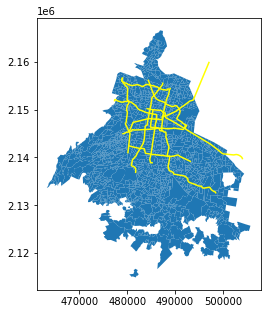

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [69]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

SISTEMA     0
LINEA       0
RUTA        0
geometry    0
dtype: int64


Index(['SISTEMA', 'LINEA', 'RUTA', 'geometry'], dtype='object')

In [70]:
cols = ['RUTA', 'geometry']
metro_lines = rp_list_shapefiles[item][cols]
metro_lines.head(3)

,RUTA,geometry
0,Observatorio - Pantitlàn,"LINESTRING Z (478958.079 2144909.693 0.000, 47..."
1,Cuatro Caminos - Tasqueña,"LINESTRING Z (477345.656 2151695.912 0.000, 47..."
2,Indios Verdes - Universidad,"LINESTRING Z (487459.272 2155641.308 0.000, 48..."


In [71]:
processed_list_shapefiles.append(metro_lines)

## 11 Public markets

In [72]:
item = 12
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(329, 7) 



,na,delegacion,mercado,num_locale,coor_geo_y,coor_geo_x,geometry
0,1.0,AZCAPOTZALCO,AZCAPOTZALCO,546.0,19.482871914699999,-99.185438999900001,POINT (480539.527 2154268.070)
1,2.0,AZCAPOTZALCO,SANTA LUCIA,150.0,19.476416914700000,-99.196398999899998,POINT (479388.535 2153555.076)
2,3.0,AZCAPOTZALCO,NUEVA SANTA MARIA,126.0,19.464395914699999,-99.169259999900007,POINT (482235.386 2152221.876)
3,4.0,AZCAPOTZALCO,JARDIN 23 DE ABRIL,154.0,19.482363914699999,-99.215321999899999,POINT (477403.442 2154215.516)
4,5.0,AZCAPOTZALCO,JARDIN FORTUNA NACIONAL,71.0,19.480751914700001,-99.205177999900002,POINT (478467.776 2154035.838)


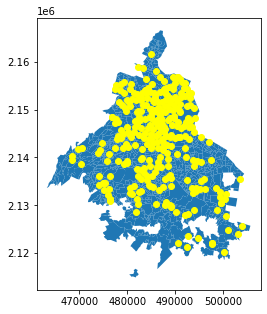

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [74]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

na            0
delegacion    0
mercado       0
num_locale    0
coor_geo_y    0
coor_geo_x    0
geometry      0
dtype: int64


Index(['na', 'delegacion', 'mercado', 'num_locale', 'coor_geo_y', 'coor_geo_x', 'geometry'], dtype='object')

In [75]:
cols = ['mercado', 'geometry']
public_markets = rp_list_shapefiles[item][cols]
public_markets.head(3)

,mercado,geometry
0,AZCAPOTZALCO,POINT (480539.527 2154268.070)
1,SANTA LUCIA,POINT (479388.535 2153555.076)
2,NUEVA SANTA MARIA,POINT (482235.386 2152221.876)


In [76]:
processed_list_shapefiles.append(public_markets)

## 12 Public parking spaces

In [77]:
item = 13
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(2270, 39) 



,ID,NOM_ESTAB,RAZ_SOCIAL,CODIGO_ACT,NOMBRE_ACT,PER_OCU,TIPO_VIAL,NOM_VIAL,TIPO_V_E_1,NOM_V_E_1,TIPO_V_E_2,NOM_V_E_2,TIPO_V_E_3,NOM_V_E_3,NUMERO_EXT,LETRA_EXT,EDIFICIO,NUMERO_INT,LETRA_INT,TIPO_ASENT,NOMB_ASENT,TIPOCENCOM,NOM_CENCOM,NUM_LOCAL,COD_POSTAL,CVE_ENT,ENTIDAD,CVE_MUN,MUNICIPIO,CVE_LOC,LOCALIDAD,AGEB,MANZANA,CORREOELEC,WWW,LATITUD,LONGITUD,FECHA_ALTA,geometry
0,1,BDI PARKING,BDI PARKING SA DE CV,812410,Estacionamientos y pensiones para veh culos au...,11 a 30 personas,CALLE,FRANCISCO DE P. MIRANDA,CALLE,PARQUE VICTORIA,BOULEVARD,ADOLFO LDPEZ MATEOS,BOULEVARD,ADOLFO LDPEZ MATEOS,71,None,None,None,None,COLONIA,MERCED GOMEZ,None,None,None,01600,09,CIUDAD DE MZXICO,010,Ãlvaro ObregÃ³n,0001,0lvaro ObregXn,0830,005,None,WWW.BDIPARKING.COM,19.369033,-99.192204,2019-04,POINT (479815.567 2141672.207)
1,2,BDI PARKING,BDI PARKING SA DE CV,812410,Estacionamientos y pensiones para veh culos au...,0 a 5 personas,AVENIDA,DIVISION DEL NORTE,CALLE,BENITO JUAREZ,CALZADA,CALZADA DE TLALPAN,CALLE,TALLO,3651,None,CENTRO COMERCIAL REAL DE COYOACAN,None,None,COLONIA,PUEBLO SAN PABLO TEPETLAPA,CENTRO Y PLAZA COMERCIAL,CENTRO COMERCIAL REAL DE COYOACAN,SOTANO,04620,09,CIUDAD DE MRXICO,003,CoyoacÃ¡n,0001,Coyoac n,0677,008,None,WWW.BDIPARKING.COM,19.321264,-99.138997,2019-11,POINT (485398.832 2136381.064)
2,3,BDI PARKING,BDI PARKING SA,812410,Estacionamientos y pensiones para veh culos au...,6 a 10 personas,AVENIDA,TLAHUAC,CALLE,SIN REFERENCIA,AVENIDA,JOSE CLEMENTE OROZCO,CALLE,SIN REFERENCIA,1577,None,PASAJE Y ANDADOR COMERCIAL,None,None,COLONIA,U.H. MIRASOLES,PASAJE Y ANDADOR COMERCIAL,PLAZA TULYEHUALCO,1577,09910,09,CIUDAD DE MHXICO,007,Iztapalapa,0001,Iztapalapa,3897,012,None,None,19.316821,-99.073959,2019-11,POINT (492230.710 2135885.264)
3,4,BDI PARKING,BDI PARKING SA DE CV,812410,Estacionamientos y pensiones para veh culos au...,6 a 10 personas,CALLE,AJUSCO,CALLE,MONROVIA,CIRCUITO,INTERIOR (AVENIDA RIO CHURUBUSCO),CALLE,MONROVIA,126,None,None,None,None,COLONIA,PORTALES SUR,None,None,None,03300,09,CIUDAD DE MRXICO,014,Benito JuÃ¡rez,0001,Benito Ju rez,0990,023,BDIPARKING@BDI.COM.MX,None,19.358158,-99.152647,2019-11,POINT (483968.572 2140464.647)
4,5,AZA ESTACIONAMIENTOS PUBLICOS Y PRIVADOS,None,812410,Estacionamientos y pensiones para vehDculos au...,0 a 5 personas,CIRCUITO,INTERIOR (CALZADA MELCHOR OCAMPO),CALLE,ATZAYACATL,CALLE,TIZOC,CALLE,QUETZALCTATL,87,None,None,None,None,COLONIA,TLAXPANA,None,None,None,11370,09,CIUDAD DE MLXICO,016,Miguel Hidalgo,0001,Miguel Hidalgo,050A,008,JUANALBERTOZAV@HOTMAIL.COM,None,19.438847,-99.168395,2014-12,POINT (482323.400 2149394.730)


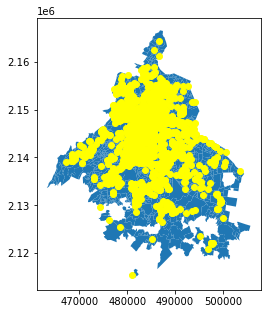

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [78]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [79]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

ID               0
NOM_ESTAB        0
RAZ_SOCIAL    1082
CODIGO_ACT       0
NOMBRE_ACT       0
PER_OCU          0
TIPO_VIAL        0
NOM_VIAL         1
TIPO_V_E_1       0
NOM_V_E_1        0
TIPO_V_E_2       2
NOM_V_E_2        0
TIPO_V_E_3       3
NOM_V_E_3        0
NUMERO_EXT     196
LETRA_EXT     1913
EDIFICIO      2145
NUMERO_INT    1404
LETRA_INT     2181
TIPO_ASENT       0
NOMB_ASENT       0
TIPOCENCOM    2123
NOM_CENCOM    2136
NUM_LOCAL     2137
COD_POSTAL       0
CVE_ENT          0
ENTIDAD          0
CVE_MUN          0
MUNICIPIO        0
CVE_LOC          0
LOCALIDAD        0
AGEB             0
MANZANA          0
CORREOELEC    1740
WWW           1893
LATITUD          0
LONGITUD         0
FECHA_ALTA       0
geometry         0
dtype: int64


Index(['ID', 'NOM_ESTAB', 'RAZ_SOCIAL', 'CODIGO_ACT', 'NOMBRE_ACT', 'PER_OCU', 'TIPO_VIAL', 'NOM_VIAL', 'TIPO_V_E_1', 'NOM_V_E_1', 'TIPO_V_E_2', 'NOM_V_E_2', 'TIPO_V_E_3', 'NOM_V_E_3', 'NUMERO_EXT', 'LETRA_EXT', 'EDIFICIO', 'NUMERO_INT', 'LETRA_INT', 'TIPO_ASENT', 'NOMB_ASENT', 'TIPOCENCOM', 'NOM_CENCOM', 'NUM_LOCAL', 'COD_POSTAL', 'CVE_ENT', 'ENTIDAD', 'CVE_MUN', 'MUNICIPIO', 'CVE_LOC', 'LOCALIDAD', 'AGEB', 'MANZANA', 'CORREOELEC', 'WWW', 'LATITUD', 'LONGITUD', 'FECHA_ALTA', 'geometry'], dtype='object')

In [80]:
cols = ['NOM_ESTAB', 'geometry']
public_parking = rp_list_shapefiles[item][cols]
public_parking.head(3)

,NOM_ESTAB,geometry
0,BDI PARKING,POINT (479815.567 2141672.207)
1,BDI PARKING,POINT (485398.832 2136381.064)
2,BDI PARKING,POINT (492230.710 2135885.264)


In [81]:
processed_list_shapefiles.append(public_parking)

## 13 Public and private hospitals

In [82]:
item = 14
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(791, 69) 



,ID,CLUES,NOMBRE_DE,CLAVE_DE_L,NOMBRE_DEL,CLAVE_DEL,NOMBRE_D_1,CLAVE_DE_1,NOMBRE_D_2,CLAVE_DE_2,NOMBRE_D_3,CLAVE_DE_3,NOMBRE_TIP,CLAVE_TIPO,NOMBRE_D_4,CLAVE_DE_T,NOMBRE_D_5,CLAVE_DE_S,CLAVE_SCIA,DESCRIPCIO,CONSULTORI,CONSULTO_1,TOTAL_DE_C,CAMAS_EN_A,CAMAS_EN_O,TOTAL_DE_1,NOMBRE_D_6,CLAVE_DE_V,TIPO_DE_VI,VIALIDAD,NUMERO_EXT,NUMERO_INT,CLAVE_DE_4,TIPO_DE_AS,ASENTAMIEN,ENTRE_TIPO,ENTRE_VIAL,ENTRE_TI_1,ENTRE_VI_1,OBSERVACIO,CODIGO_POS,ESTATUS_DE,CLAVE_DE_E,TIENE_LICE,NUMERO_DE,TIENE_AVIS,FECHA_EMIS,RFC_DEL_ES,FECHA_DE_C,FECHA_DE_I,LONGITUD,LATITUD,NOMBRE_D_7,CLAVE_DE_5,NIVEL_ATEN,CLAVE_NIVE,ESTATUS_AC,CLAVE_ESTA,ACREDITACI,SUBACREDIT,ESTRATO_UN,CLAVE_ESTR,TIPO_OBRA,CLAVE_TI_1,HORARIO_DE,AREAS_Y_SE,ULTIMO_MOV,FECHA_ULTI,geometry
0,4870.0,DFCRO000011,CIUDAD DE MEXICO,09,MIGUEL HIDALGO,016,MIGUEL HIDALGO,0001,MIGUEL HIDALGO,13,CRUZ ROJA MEXICANA,CRO,DE HOSPITALIZACIÃN,2,NO ESPECIFICADO,99,NO ESPECIFICADO,99,None,None,5.0,0.0,5.0,60.0,0.0,60.0,CENTRO DE TRAUMA DE CRUZ ROJA MEXICANA EN EL D...,5,CALLE,EJÃRCITO NACIONAL,1032,None,None,None,LOS MORALES POLANCO,None,None,None,None,"AV. EJÃRCITO NACIONAL NO. 1032, COLONIA LOS M...",11510,EN OPERACION,1,None,None,None,None,XAXX111111,None,2004-03-01,-99.2088913,19.4385309,NO ESPECIFICADO,99,SEGUNDO NIVEL,2,NO TIENE,5,None,None,URBANO,2,NO ESPECIFICADO,6,None,None,ALTA,2008-08-22,POINT (478072.411 2149364.387)
1,4973.0,DFIMS000020,CIUDAD DE MEXICO,09,AZCAPOTZALCO,002,AZCAPOTZALCO,0001,AZCAPOTZALCO,02,INSTITUTO MEXICANO DEL SEGURO SOCIAL,IMSS,DE HOSPITALIZACIÃN,2,HOSPITAL DE ESPECIALIDADES,HESP,NO ESPECIFICADO,99,None,None,75.0,0.0,75.0,465.0,0.0,465.0,HES CM LA RAZA,None,None,SERIS Y ZAACHILA,None,None,None,None,LA RAZA,None,None,None,None,"SERIS Y ZAACHILA COL. LA RAZA C.P. 02990, AZC...",02990,EN OPERACION,1,None,None,None,None,XAXX111111,None,None,-99.1442,19.4662,NO ESPECIFICADO,99,TERCER NIVEL,3,NO TIENE,5,None,None,URBANO,2,NO ESPECIFICADO,6,None,None,ALTA,2005-12-31,POINT (484865.720 2152419.107)
2,4975.0,DFIMS000044,CIUDAD DE MEXICO,09,AZCAPOTZALCO,002,AZCAPOTZALCO,0001,AZCAPOTZALCO,02,INSTITUTO MEXICANO DEL SEGURO SOCIAL,IMSS,DE HOSPITALIZACIÃN,2,HOSPITAL DE GINECO-OBSTETRICIA,HGO,NO ESPECIFICADO,99,None,None,31.0,0.0,31.0,306.0,0.0,306.0,HGO CM LA RAZA,5,CALLE,VALLEJO ESQUINA ANTONIO VALERIANO,None,None,None,None,LA RAZA,None,None,None,None,CLZD. VALLEJO ESQ. ANTONIO VALERIANO COL. LA ...,02990,EN OPERACION,1,None,None,None,None,XAXX111111,None,None,-99.1470262,19.4664404,NO ESPECIFICADO,99,SEGUNDO NIVEL,2,NO TIENE,5,None,None,URBANO,2,NO ESPECIFICADO,6,None,None,ALTA,2005-12-31,POINT (484569.123 2152445.960)
3,4976.0,DFIMS000056,CIUDAD DE MEXICO,09,AZCAPOTZALCO,002,AZCAPOTZALCO,0001,AZCAPOTZALCO,02,INSTITUTO MEXICANO DEL SEGURO SOCIAL,IMSS,DE HOSPITALIZACIÃN,2,HOSPITAL INFECTOLOGÃA,HINF,NO ESPECIFICADO,99,None,None,6.0,0.0,6.0,148.0,0.0,148.0,HINFEC CM LA RAZA,None,None,ZAACHILA Y JACARANDAS,SIN NÃMERO,None,None,None,LA RAZA,None,None,None,None,ZAACHILA Y JACARANDAS S/N COL. LA RAZA C.P. 0...,02990,EN OPERACION,1,None,None,None,None,XAXX111111,None,None,-99.144716,19.466279,NO ESPECIFICADO,99,TERCER NIVEL,3,NO TIENE,5,None,None,URBANO,2,NO ESPECIFICADO,6,None,None,ALTA,2005-12-31,POINT (484811.571 2152427.894)
4,4977.0,DFIMS000061,CIUDAD DE MEXICO,09,AZCAPOTZALCO,002,AZCAPOTZALCO,0001,AZCAPOTZALCO,02,INSTITUTO MEXICANO DEL SEGURO SOCIAL,IMSS,DE HOSPITALIZACIÃN,2,HOSPITAL GENERAL,HG,NO ESPECIFICADO,99,None,None,69.0,0.0,69.0,523.0,0.0,523.0,HG CM LA RAZA,5,CALLE,VALLEJO Y JACARANDAS,None,None,None,None,LA RAZA,None,None,None,None,CLZD. VALLEJO Y JACARANDAS COL. LA RAZA C.P. ...,02990,EN OPERACION,1,None,None,None,None,XAXX111111,None,None,-99.182,19.486,NO ESPECIFICADO,99,SEGUNDO NIVEL,2,NO TIENE,5,None,None,URBANO,2,NO ESPECIFICADO,6,None,None,ALTA,2005-12-31,POINT (480900.792 2154613.819)


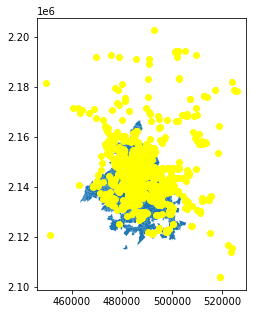

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [83]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [84]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

ID              0
CLUES           0
NOMBRE_DE       0
CLAVE_DE_L      0
NOMBRE_DEL      0
CLAVE_DEL       0
NOMBRE_D_1      0
CLAVE_DE_1      0
NOMBRE_D_2      0
CLAVE_DE_2      0
NOMBRE_D_3      0
CLAVE_DE_3      0
NOMBRE_TIP      0
CLAVE_TIPO      0
NOMBRE_D_4      0
CLAVE_DE_T      0
NOMBRE_D_5      0
CLAVE_DE_S      0
CLAVE_SCIA    714
DESCRIPCIO    714
CONSULTORI      0
CONSULTO_1      0
TOTAL_DE_C      0
CAMAS_EN_A      0
CAMAS_EN_O      0
TOTAL_DE_1      0
NOMBRE_D_6      0
CLAVE_DE_V    461
TIPO_DE_VI    461
VIALIDAD        0
NUMERO_EXT     32
NUMERO_INT    677
CLAVE_DE_4    706
TIPO_DE_AS    706
ASENTAMIEN     18
ENTRE_TIPO    715
ENTRE_VIAL    715
ENTRE_TI_1    718
ENTRE_VI_1    717
OBSERVACIO     58
CODIGO_POS      4
ESTATUS_DE      0
CLAVE_DE_E      0
TIENE_LICE    719
NUMERO_DE     721
TIENE_AVIS    736
FECHA_EMIS    760
RFC_DEL_ES     28
FECHA_DE_C    238
FECHA_DE_I    109
LONGITUD        0
LATITUD         0
NOMBRE_D_7      2
CLAVE_DE_5      2
NIVEL_ATEN      0
CLAVE_NIVE

Index(['ID', 'CLUES', 'NOMBRE_DE', 'CLAVE_DE_L', 'NOMBRE_DEL', 'CLAVE_DEL', 'NOMBRE_D_1', 'CLAVE_DE_1', 'NOMBRE_D_2', 'CLAVE_DE_2', 'NOMBRE_D_3', 'CLAVE_DE_3', 'NOMBRE_TIP', 'CLAVE_TIPO', 'NOMBRE_D_4', 'CLAVE_DE_T', 'NOMBRE_D_5', 'CLAVE_DE_S', 'CLAVE_SCIA', 'DESCRIPCIO', 'CONSULTORI', 'CONSULTO_1', 'TOTAL_DE_C', 'CAMAS_EN_A', 'CAMAS_EN_O', 'TOTAL_DE_1', 'NOMBRE_D_6', 'CLAVE_DE_V', 'TIPO_DE_VI', 'VIALIDAD', 'NUMERO_EXT', 'NUMERO_INT', 'CLAVE_DE_4', 'TIPO_DE_AS', 'ASENTAMIEN', 'ENTRE_TIPO', 'ENTRE_VIAL', 'ENTRE_TI_1', 'ENTRE_VI_1', 'OBSERVACIO', 'CODIGO_POS', 'ESTATUS_DE', 'CLAVE_DE_E', 'TIENE_LICE', 'NUMERO_DE', 'TIENE_AVIS', 'FECHA_EMIS', 'RFC_DEL_ES', 'FECHA_DE_C', 'FECHA_DE_I', 'LONGITUD', 'LATITUD', 'NOMBRE_D_7', 'CLAVE_DE_5', 'NIVEL_ATEN', 'CLAVE_NIVE', 'ESTATUS_AC', 'CLAVE_ESTA', 'ACREDITACI', 'SUBACREDIT', 'ESTRATO_UN', 'CLAVE_ESTR', 'TIPO_OBRA', 'CLAVE_TI_1', 'HORARIO_DE', 'AREAS_Y_SE', 'ULTIMO_MOV', 'FECHA_ULTI', 'geometry'], dtype='object')

In [85]:
hospitals = rp_list_shapefiles[item]
print(hospitals.NOMBRE_DE.unique())

['CIUDAD DE MEXICO' 'HIDALGO' 'MEXICO']


In [86]:
hospitals = hospitals[hospitals.NOMBRE_DE == 'CIUDAD DE MEXICO']
print(hospitals.NOMBRE_DE.unique())
print(hospitals.NOMBRE_DEL.unique())

['CIUDAD DE MEXICO']
['MIGUEL HIDALGO' 'AZCAPOTZALCO' 'COYOACÃ\x81N' 'GUSTAVO A. MADERO'
 'IZTACALCO' 'IZTAPALAPA' 'Ã\x81LVARO OBREGÃ\x93N' 'TLALPAN'
 'BENITO JUÃ\x81REZ' 'CUAUHTÃ\x89MOC' 'LA MAGDALENA CONTRERAS'
 'MILPA ALTA' 'TLÃ\x81HUAC' 'XOCHIMILCO' 'VENUSTIANO CARRANZA'
 'CUAJIMALPA DE MORELOS']


In [87]:
cols = ['CLUES', 'geometry']
hospitals = hospitals[cols]
hospitals.head(3)

,CLUES,geometry
0,DFCRO000011,POINT (478072.411 2149364.387)
1,DFIMS000020,POINT (484865.720 2152419.107)
2,DFIMS000044,POINT (484569.123 2152445.960)


In [88]:
processed_list_shapefiles.append(hospitals)

## 14 RTP line routes

In [89]:
item = 15
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(200, 13) 



,SISTEMA,RUTA,NOMBRE,ORIGEN,DESTINO,MODULO,ORDINARIO,ATENEA,EXPRESO,ECOBUS,DIRECTO,NOCHEBUS,geometry
0,Red de Transporte de Pasajeros,101-A,Malacates - Ferroplaza,Ampliación Malacates,La Villa (Ferroplaza),6,SI,SI,NO,NO,NO,NO,"LINESTRING (486274.891 2164604.016, 486287.054..."
1,Red de Transporte de Pasajeros,101-A,Ferroplaza - Malacates,La Villa (Ferroplaza),Ampliación Malacates,6,SI,SI,NO,NO,NO,NO,"LINESTRING (487894.378 2154001.604, 487902.877..."
2,Red de Transporte de Pasajeros,101-B,Forestal - Ferroplaza,Col. Forestal,La Villa (Ferroplaza),6,SI,SI,NO,NO,NO,NO,"LINESTRING (486781.430 2163549.425, 486766.933..."
3,Red de Transporte de Pasajeros,101-B,Ferroplaza - Forestal,La Villa (Ferroplaza),Col. Forestal,6,SI,SI,NO,NO,NO,NO,"LINESTRING (487894.378 2154001.604, 487902.877..."
4,Red de Transporte de Pasajeros,101-D,La Brecha - Ferroplaza,La Brecha,La Villa (Ferroplaza),6,SI,SI,SI,NO,NO,NO,"LINESTRING (486926.734 2161001.382, 486936.695..."


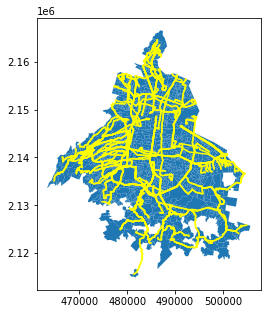

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [90]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [91]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

SISTEMA      0
RUTA         0
NOMBRE       0
ORIGEN       0
DESTINO      0
MODULO       0
ORDINARIO    0
ATENEA       0
EXPRESO      0
ECOBUS       0
DIRECTO      0
NOCHEBUS     0
geometry     0
dtype: int64


Index(['SISTEMA', 'RUTA', 'NOMBRE', 'ORIGEN', 'DESTINO', 'MODULO', 'ORDINARIO', 'ATENEA', 'EXPRESO', 'ECOBUS', 'DIRECTO', 'NOCHEBUS', 'geometry'], dtype='object')

In [92]:
cols = ['NOMBRE', 'geometry']
rtp_lines = rp_list_shapefiles[item][cols]
rtp_lines.head(3)

,NOMBRE,geometry
0,Malacates - Ferroplaza,"LINESTRING (486274.891 2164604.016, 486287.054..."
1,Ferroplaza - Malacates,"LINESTRING (487894.378 2154001.604, 487902.877..."
2,Forestal - Ferroplaza,"LINESTRING (486781.430 2163549.425, 486766.933..."


In [93]:
processed_list_shapefiles.append(rtp_lines)

## 15 Train stations

In [94]:
item = 16
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(18, 13) 



,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,CVE_EOD17,TIPO,ALCALDIAS,AÑO,Ramp_s_rue,Elevadores,Guia_tact,geometry
0,STE Tren ligero,Xochimilco,01,18,TL0118,12016,Terminal,Xochimilco,1988,Sí,No,Sí,POINT Z (488646.343 2129539.511 0.000)
1,STE Tren ligero,Francisco Goitia,01,17,TL0117,12004,Intermedia,Xochimilco,1988,Sí,No,Sí,POINT Z (488310.092 2129681.621 0.000)
2,STE Tren ligero,Huichapan,01,16,TL0116,12005,Intermedia,Xochimilco,1988,Sí,No,Sí,POINT Z (487533.543 2130093.345 0.000)
3,STE Tren ligero,La Noria,01,15,TL0115,12007,Intermedia,Xochimilco,1988,Sí,No,Sí,POINT Z (486806.992 2130477.041 0.000)
4,STE Tren ligero,Tepepan,01,14,TL0114,12014,Intermedia,Xochimilco,1988,No,No,Sí,POINT Z (486008.543 2131762.838 0.000)


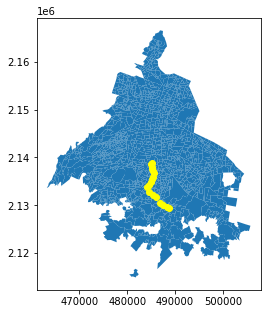

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [95]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [96]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

SISTEMA       0
NOMBRE        0
LINEA         0
EST           0
CVE_EST       0
CVE_EOD17     0
TIPO          0
ALCALDIAS     0
AÑO           0
Ramp_s_rue    0
Elevadores    0
Guia_tact     0
geometry      0
dtype: int64


Index(['SISTEMA', 'NOMBRE', 'LINEA', 'EST', 'CVE_EST', 'CVE_EOD17', 'TIPO', 'ALCALDIAS', 'AÑO', 'Ramp_s_rue', 'Elevadores', 'Guia_tact', 'geometry'], dtype='object')

In [97]:
cols = ['NOMBRE', 'geometry']
train_stations = rp_list_shapefiles[item][cols]
train_stations.head(3)

,NOMBRE,geometry
0,Xochimilco,POINT Z (488646.343 2129539.511 0.000)
1,Francisco Goitia,POINT Z (488310.092 2129681.621 0.000)
2,Huichapan,POINT Z (487533.543 2130093.345 0.000)


In [98]:
processed_list_shapefiles.append(train_stations)

## 16 Train line routes

In [99]:
item = 17
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(1, 4) 



,SISTEMA,LINEA,RUTA,geometry
0,STE Tren ligero,1,Tasqueña - Xochimilco,"LINESTRING Z (488646.343 2129539.511 0.000, 48..."


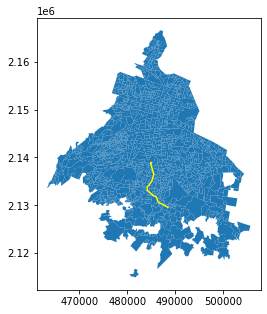

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [100]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [101]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

SISTEMA     0
LINEA       0
RUTA        0
geometry    0
dtype: int64


Index(['SISTEMA', 'LINEA', 'RUTA', 'geometry'], dtype='object')

In [102]:
cols = ['RUTA', 'geometry']
train_lines = rp_list_shapefiles[item][cols]
train_lines.head(3)

,RUTA,geometry
0,Tasqueña - Xochimilco,"LINESTRING Z (488646.343 2129539.511 0.000, 48..."


In [103]:
processed_list_shapefiles.append(train_lines)

## 17 Trolebus line routes

In [104]:
item = 18
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(9, 4) 



,SISTEMA,LINEA,RUTA,geometry
0,STE Trolebús,7,Ciudad Universitaria - Tasqueña - Tláhuac,"LINESTRING Z (479983.250 2137961.816 0.000, 47..."
1,STE Trolebús,1,Autobuses del Norte - Autobuses del Sur,"LINESTRING Z (484970.133 2147584.941 0.000, 48..."
2,STE Trolebús,2,Metro Chapultepec - Metro Pantitlán,MULTILINESTRING Z ((487269.626 2146611.566 0.0...
3,STE Trolebús,3,Metro Mixcoac - Sn. Andres Tetepilco,"LINESTRING Z (480246.852 2142424.301 0.000, 48..."
4,STE Trolebús,4,Metro El Rosario - Metro Boulevard Puerto Aéreo,"LINESTRING Z (479139.543 2157416.558 0.000, 47..."


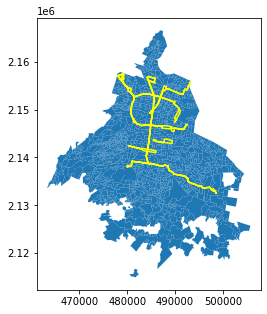

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [105]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [106]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

SISTEMA     0
LINEA       0
RUTA        0
geometry    0
dtype: int64


Index(['SISTEMA', 'LINEA', 'RUTA', 'geometry'], dtype='object')

In [107]:
cols = ['RUTA', 'geometry']
trolebus_lines = rp_list_shapefiles[item][cols]
trolebus_lines.head(3)

,RUTA,geometry
0,Ciudad Universitaria - Tasqueña - Tláhuac,"LINESTRING Z (479983.250 2137961.816 0.000, 47..."
1,Autobuses del Norte - Autobuses del Sur,"LINESTRING Z (484970.133 2147584.941 0.000, 48..."
2,Metro Chapultepec - Metro Pantitlán,MULTILINESTRING Z ((487269.626 2146611.566 0.0...


In [108]:
processed_list_shapefiles.append(trolebus_lines)

## 18 Trolebus stations

In [109]:
item = 19
print(rp_list_shapefiles[item].shape, '\n')
rp_list_shapefiles[item].head()

(723, 9) 



,SISTEMA,LINEA,NOMBRE,CVE_EST,TIPO,ALCALDIAS,EST,Ramp_s_rue,geometry
0,STE Trolebús,01,Central del Norte,TROLE01 - I01,Terminal,Gustavo A. Madero,I01,Sí,POINT Z (485267.346 2153881.997 0.000)
1,STE Trolebús,01,CCH Vallejo,TROLE01 - I02,Intermedia,Gustavo A. Madero,I02,Sí,POINT Z (485080.809 2154380.025 0.000)
2,STE Trolebús,01,Instituto del Petróleo N,TROLE01 - I03,Intermedia,Gustavo A. Madero,I03,Sí,POINT Z (484890.664 2154900.033 0.000)
3,STE Trolebús,01,Montevideo,TROLE01 - I04,Transbordo,Gustavo A. Madero,I04,Sí,POINT Z (484710.936 2155379.856 0.000)
4,STE Trolebús,01,U.H. Lindavista-Vallejo,TROLE01 - I05,Transbordo,Gustavo A. Madero,I05,Sí,POINT Z (484650.913 2155292.782 0.000)


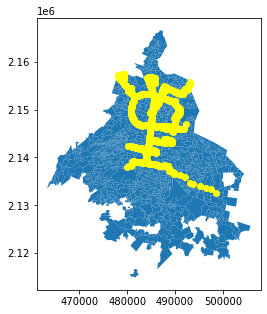

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [110]:
ax = neighborhoods_cdmx.plot(figsize=(5,5))
rp_list_shapefiles[item].plot(ax=ax, color = 'yellow')
plt.show()
rp_list_shapefiles[item].crs

In [111]:
print(rp_list_shapefiles[item].isna().sum())
rp_list_shapefiles[item].columns

SISTEMA       0
LINEA         0
NOMBRE        0
CVE_EST       0
TIPO          0
ALCALDIAS     0
EST           0
Ramp_s_rue    0
geometry      0
dtype: int64


Index(['SISTEMA', 'LINEA', 'NOMBRE', 'CVE_EST', 'TIPO', 'ALCALDIAS', 'EST', 'Ramp_s_rue', 'geometry'], dtype='object')

In [112]:
cols = ['CVE_EST', 'geometry']
trolebus_stations = rp_list_shapefiles[item][cols]
trolebus_stations.head(3)

,CVE_EST,geometry
0,TROLE01 - I01,POINT Z (485267.346 2153881.997 0.000)
1,TROLE01 - I02,POINT Z (485080.809 2154380.025 0.000)
2,TROLE01 - I03,POINT Z (484890.664 2154900.033 0.000)


In [113]:
processed_list_shapefiles.append(trolebus_stations)

# 5. Categorise the processed files (table, point data, lines)

In [114]:
join_shapefiles = [processed_list_shapefiles[0], processed_list_shapefiles[1], processed_list_shapefiles[6]]
point_shapefiles = [processed_list_shapefiles[2], processed_list_shapefiles[4], processed_list_shapefiles[7], 
                       processed_list_shapefiles[9], processed_list_shapefiles[11], processed_list_shapefiles[12],
                       processed_list_shapefiles[13], processed_list_shapefiles[15], processed_list_shapefiles[18]]
lines_shapefiles = [processed_list_shapefiles[3], processed_list_shapefiles[5], processed_list_shapefiles[8], 
                       processed_list_shapefiles[10], processed_list_shapefiles[14], processed_list_shapefiles[16],
                       processed_list_shapefiles[17]]

In [115]:
len(processed_list_shapefiles)

19

# 6. Points in polygon (neighborhoods)

In [116]:
pip_gdf = pps.countPointsInPolygon(point_shapefiles, neighborhoods_cdmx)
pip_gdf.head()

key_neighbor      0
cablebus_sta      0
commer_venues     0
health_centres    0
metro_sta         0
pmarkets          0
pparking          0
hospitals         0
train_sta         0
trolebus_sta      0
dtype: int64


,key_neighbor,cablebus_sta,commer_venues,health_centres,metro_sta,pmarkets,pparking,hospitals,train_sta,trolebus_sta
0,02-001,0,0,0,0,0,0,0,0,2
1,02-002,0,0,0,0,0,0,0,0,0
2,02-005,0,0,0,1,0,2,0,0,0
3,02-006,0,0,0,0,1,0,1,0,0
4,02-007,0,5,0,0,1,14,6,0,6


# 7. Lines intersecting polygon

In [117]:
lip_gdf = pps.countLinesIntersectPolygon(lines_shapefiles, neighborhoods_cdmx)
lip_gdf.head()

,key_neighbor,cablebus_lines,ptransp_routes,main_roads,metro_lines,rtp_lines,train_lines,trolebus_lines
0,02-001,0,9,1,0,6,0,1
1,02-002,0,2,1,0,4,0,1
2,02-005,0,30,0,1,6,0,0
3,02-006,0,6,0,0,3,0,0
4,02-007,0,38,2,0,10,0,2


# 8. Merge aggregated shapefiles

In [118]:
# Merge shapefiles that with data aggregated at the neighborhood level
joined_gdfs = pps.mergeAttributesPolygons(join_shapefiles, neighborhoods_cdmx, 'aggregated')
joined_gdfs.head()

key_neighbor        0
centres_vaw         0
be_schools          0
commercial_units    0
industrial_units    0
service_units       0
dtype: int64 

Geodataframe shape:  (1815, 6)


,key_neighbor,centres_vaw,be_schools,commercial_units,industrial_units,service_units
0,02-001,0,1,63,10,43
1,02-002,0,2,52,13,56
2,02-005,0,3,53,10,89
3,02-006,0,4,164,22,88
4,02-007,1,7,509,24,438


In [119]:
# Merge all shapefiles
final_merged_gdfs = pps.mergeAttributesPolygons([pip_gdf, lip_gdf, joined_gdfs], neighborhoods_cdmx, 'final')
final_merged_gdfs.to_csv()
final_merged_gdfs.head()

key_neighbor        0
name_neighbor       0
geometry            0
key_borough         0
name_borough        0
cablebus_sta        0
commer_venues       0
health_centres      0
metro_sta           0
pmarkets            0
pparking            0
hospitals           0
train_sta           0
trolebus_sta        0
cablebus_lines      0
ptransp_routes      0
main_roads          0
metro_lines         0
rtp_lines           0
train_lines         0
trolebus_lines      0
centres_vaw         0
be_schools          0
commercial_units    0
industrial_units    0
service_units       0
dtype: int64 

Geodataframe shape:  (1815, 26)


,key_neighbor,name_neighbor,geometry,key_borough,name_borough,cablebus_sta,commer_venues,health_centres,metro_sta,pmarkets,pparking,hospitals,train_sta,trolebus_sta,cablebus_lines,ptransp_routes,main_roads,metro_lines,rtp_lines,train_lines,trolebus_lines,centres_vaw,be_schools,commercial_units,industrial_units,service_units
0,02-001,AGUILERA,"POLYGON ((483311.618 2153254.848, 483332.006 2...",2,AZCAPOTZALCO,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43
1,02-002,ALDANA,"POLYGON ((484406.956 2153012.331, 484401.132 2...",2,AZCAPOTZALCO,0,0,0,0,0,0,0,0,0,0,2,1,0,4,0,1,0,2,52,13,56
2,02-005,ANGEL ZIMBRON,"POLYGON ((480013.755 2153003.618, 480026.649 2...",2,AZCAPOTZALCO,0,0,0,1,0,2,0,0,0,0,30,0,1,6,0,0,0,3,53,10,89
3,02-006,ARENAL,"POLYGON ((484061.118 2152622.284, 484061.678 2...",2,AZCAPOTZALCO,0,0,0,0,1,0,1,0,0,0,6,0,0,3,0,0,0,4,164,22,88
4,02-007,CENTRO DE AZCAPOTZALCO,"POLYGON ((480104.707 2154525.214, 480118.178 2...",2,AZCAPOTZALCO,0,5,0,0,1,14,6,0,6,0,38,2,0,10,0,2,1,7,509,24,438


In [120]:
# Save dataset as shapefile
pps.saveToShapefile(final_merged_gdfs)
pps.saveToCSV(final_merged_gdfs)

D:\Google Drive\University of York courses\Independent Research Proposal\dissertation\code\PreProcessing.py:261: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(self.proc_data_directory + '/shapefiles/preprocessed_shapefiles_data.shp', driver ='ESRI Shapefile')
